In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate the folder name with current date and time
#folder_name = 'results/task_match_0603_2238/'
folder_name = 'results/task_match_1503_1406'

In [5]:
#open json file as dataframe
df = pd.read_json(folder_name + "/no_prompt.json").dropna()
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order
0,Customs Brokers,[Prepare and process import and export documen...,13,[Receive shipment manifests from importers to ...,0.542753,"[[0.46648636460000004, 0.6207293868, 0.7721247...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 0, 14, 5, 1, 3, 15, 10, 16, 2, 12, 8, 17, ..."
1,Training and Development Managers,[Analyze training needs to develop new trainin...,11,"[Design, develop, implement, and evaluate trai...",0.641017,"[[0.7275608778, 0.7406269908, 0.6584937572, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[3, 1, 0, 10, 5, 7, 6, 4, 8, 9, 2]"
2,"Cooks, Institution and Cafeteria",[Monitor and record food temperatures to ensur...,35,[Prepares a variety of food items for institut...,0.500613,"[[0.3885176182, 0.28439518810000003, 0.4456371...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 5, 4, 6, 0, 2, 9, 11, 8, 3, 10, 7]"


In [6]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source'], axis=1)   
jz = jz.rename(columns={'o*net-soc_code':'code', 'job_zone':'zone'})

#merge the two dataframes on title
df = pd.merge(df, jz, on='title', how='left')
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
0,Customs Brokers,[Prepare and process import and export documen...,13,[Receive shipment manifests from importers to ...,0.542753,"[[0.46648636460000004, 0.6207293868, 0.7721247...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 0, 14, 5, 1, 3, 15, 10, 16, 2, 12, 8, 17, ...",13-1041.08,3
1,Training and Development Managers,[Analyze training needs to develop new trainin...,11,"[Design, develop, implement, and evaluate trai...",0.641017,"[[0.7275608778, 0.7406269908, 0.6584937572, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[3, 1, 0, 10, 5, 7, 6, 4, 8, 9, 2]",11-3131.00,4
2,"Cooks, Institution and Cafeteria",[Monitor and record food temperatures to ensur...,35,[Prepares a variety of food items for institut...,0.500613,"[[0.3885176182, 0.28439518810000003, 0.4456371...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 5, 4, 6, 0, 2, 9, 11, 8, 3, 10, 7]",35-2012.00,2


Text(0.5, 1.0, 'mean similarity score by industry')

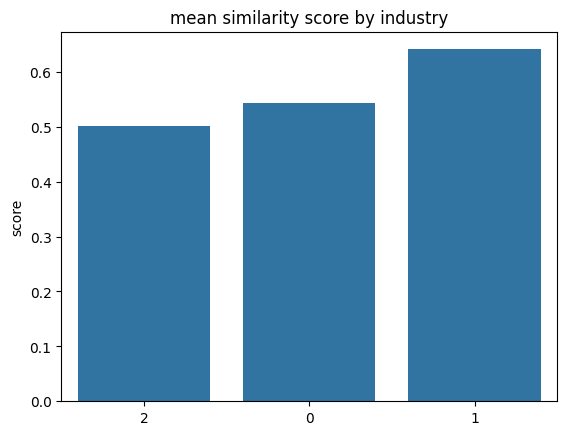

In [ ]:
#plot 

Text(0.5, 1.0, 'mean similarity score by industry')

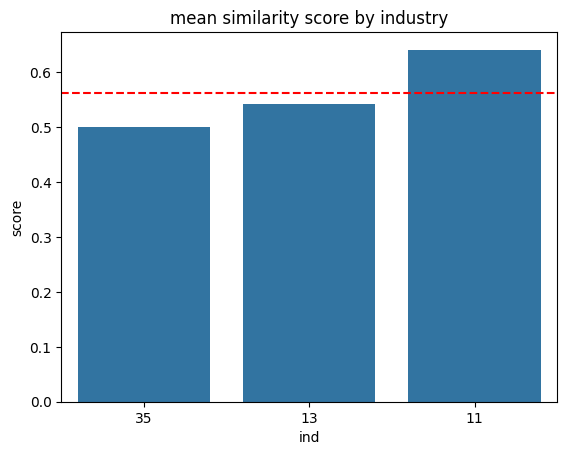

In [7]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

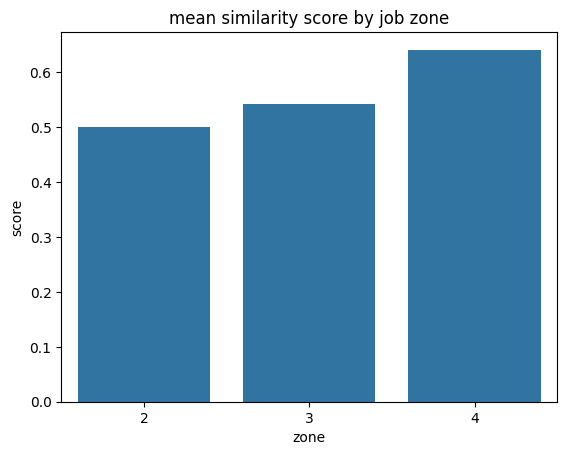

In [8]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [9]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
1,Training and Development Managers,[Analyze training needs to develop new trainin...,11,"[Design, develop, implement, and evaluate trai...",0.641017,"[[0.7275608778, 0.7406269908, 0.6584937572, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[3, 1, 0, 10, 5, 7, 6, 4, 8, 9, 2]",11-3131.00,4


Text(0.5, 1.0, 'similarity matrix of Training and Development Managers')

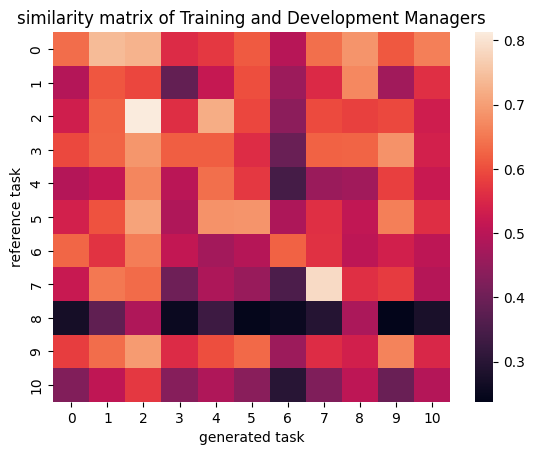

In [10]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [11]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
2,"Cooks, Institution and Cafeteria",[Monitor and record food temperatures to ensur...,35,[Prepares a variety of food items for institut...,0.500613,"[[0.3885176182, 0.28439518810000003, 0.4456371...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 5, 4, 6, 0, 2, 9, 11, 8, 3, 10, 7]",35-2012.00,2


Text(0.5, 1.0, 'similarity matrix of Cooks, Institution and Cafeteria')

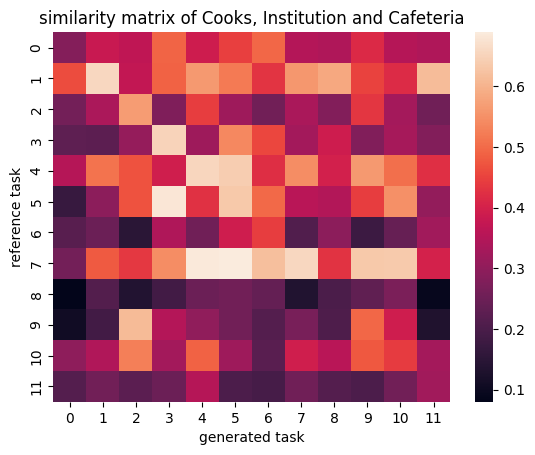

In [12]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [13]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



In [14]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [15]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 1 with score -0.20308846239999995


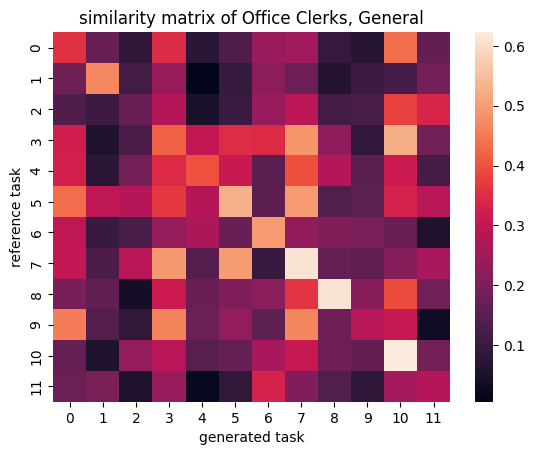

In [67]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [6]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)